#Observations and Insights 
1. Among 4 drug regimens "Capomulin", "Ramicane", "Infubinol", "Ceftamin", there is only 1 outlier for "Infubinol" in the entire dataset. This proves that the dataset for these drug regimen is reliable.
2. There is a positive corelaltion (0.84) between the mouse weight and the average tumor volume, at leaste for the mouse treated with Capomulin.  
3. Based on the bar graphs, "Capomulin" and "Ramicane" has the greatest total number of timepoints compared to the other drug regimens. They are also proved to more effective comepared to others ("Infubinol", "Ceftamin") as their tumor volumes are also smaller, based on the boxplot and the Tumor Volume Summary. 



#Part 1 - Prepare the Data

1. Run the provided package dependency and data imports, and then merge the `mouse_metadata` and `study_results` DataFrames into a single DataFrame.

2. Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining step.

3. Display the updated number of unique mice IDs.

In [2]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Create path data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read mouse data CSV and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_of_unique_mice = len(merge['Mouse ID'].unique())
number_of_unique_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
#Display the duplicates 
duplicate_mice = merge.loc[merge.duplicated(['Mouse ID', 'Timepoint'], False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge.drop_duplicates(['Mouse ID', 'Timepoint'],keep='last')


In [10]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_by_drug_regimen = clean_df.groupby('Drug Regimen')
mean =grouped_by_drug_regimen["Tumor Volume (mm3)"].mean()
median = grouped_by_drug_regimen["Tumor Volume (mm3)"].median()
variance = stdev = grouped_by_drug_regimen["Tumor Volume (mm3)"].var()
stdev = grouped_by_drug_regimen["Tumor Volume (mm3)"].std()
sem = grouped_by_drug_regimen["Tumor Volume (mm3)"].sem()

Tumor_Volume_summary = pd.DataFrame({"Mean": mean , "Median": median, "Variance": variance,
                                     "Standard deviation": stdev, "SEM" : sem})
                
Tumor_Volume_summary

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = grouped_by_drug_regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

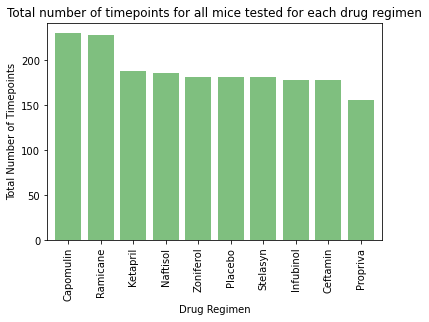

In [491]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Plot a bar chart (.plot.bar()) based on the amount of data points (.value_counts()) for each treatment regimen (data_df['Drug Regimen'])
bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width = 0.8, color = "green", alpha = .5)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Total Number of Timepoints")
bar_plot.set_title("Total number of timepoints for all mice tested for each drug regimen")
plt.show()

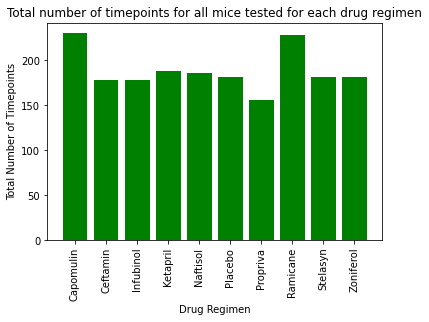

In [492]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint = grouped_by_drug_regimen['Timepoint'].count()
regimen = timepoint.index
plt.bar(regimen, timepoint, color = "green")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xticks(rotation =90)
plt.show()

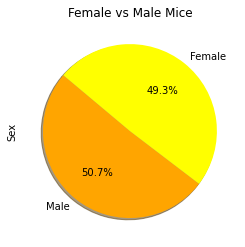

In [493]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df["Sex"].value_counts().plot(kind="pie", colors= ["orange", "yellow"], shadow=True, startangle=140, autopct="%.1f%%")
plt.title("Female vs Male Mice")
plt.show()


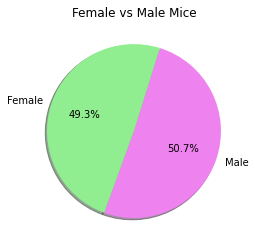

In [494]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df["Sex"].value_counts()
plt.pie(gender, labels = gender.index.values, shadow=True, startangle= 250, autopct="%.1f%%", colors = ["violet", "lightgreen"])
plt.title("Female vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [495]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max()).rename(columns= {"Timepoint" : "Max Timepoints"})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(clean_df, max_timepoint, on ="Mouse ID", how = "outer")
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoints
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [496]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [497]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for item in treaments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = new_df.loc[new_df["Drug Regimen"] == item]
    max_timepoint_only = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['Max Timepoints']]
    tumor_vol = max_timepoint_only["Tumor Volume (mm3)"]
    #add to the tumor volume list 
    tumor_vol_data.append(tumor_vol)
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {item}: {iqr}')
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    # Determine outliers using upper and lower bounds
    outliers_count = (tumor_vol.loc[(tumor_vol >= upper_bound) | 
                                        (tumor_vol <= lower_bound)]).count()
    print(f'Number of outliers: {outliers_count}')
    print("==================================================")

IQR for Capomulin: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Number of outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Number of outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Number of outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Number of outliers: 0


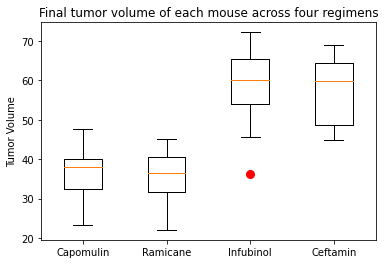

In [498]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='r')

# Plot boxplot
plt.boxplot(tumor_vol_data,flierprops=flierprops)
plt.title('Final tumor volume of each mouse across four regimens')
plt.ylabel('Tumor Volume')
plt.xticks([1,2,3,4], treaments)
plt.show()

## Line and Scatter Plots

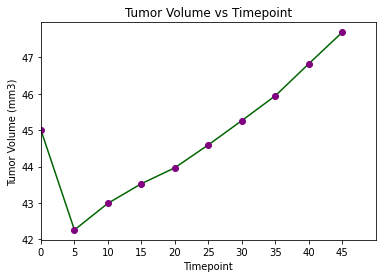

In [499]:
# Generate a line plot of tumor volume vs. time point for a mouse treated wCapomulinith 
chosen_mouse = "i557"
chosen_mouse_df = merge.loc[merge["Mouse ID"] == chosen_mouse]
plt.plot(chosen_mouse_df["Timepoint"], chosen_mouse_df["Tumor Volume (mm3)"], marker = 'o', color = "darkgreen",
         markerfacecolor = "purple", markeredgecolor = "purple")
plt.title("Tumor Volume vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(chosen_mouse_df["Timepoint"])
plt.xlim(0, 50)
plt.show()

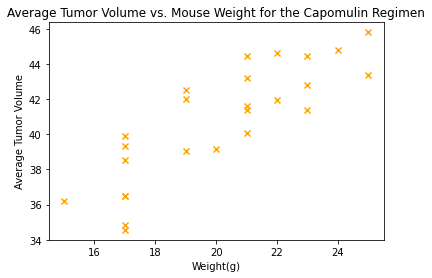

In [500]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
only_Capomulin = merge.loc[merge["Drug Regimen"] == "Capomulin"]
average_tumor_vol = only_Capomulin.groupby(only_Capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = only_Capomulin.groupby(only_Capomulin["Mouse ID"])["Weight (g)"].mean()
plt.scatter(weight, average_tumor_vol, marker= "x", color = "orange")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


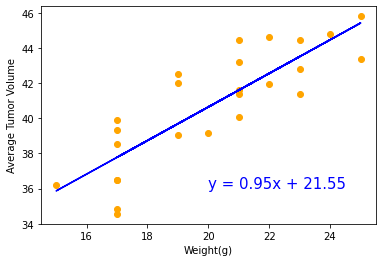

In [501]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, average_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,average_tumor_vol, color = "orange")
plt.plot(weight,regress_values,"b-")
plt.annotate(line_eq,(20,36),fontsize=15,color="blue")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()